In [ ]:
#Checking if the sentence is -ve or +ve

from keras.datasets import imdb

In [ ]:
(x_train,y_train), (x_test,y_test) = imdb.load_data()

In [ ]:
word_index = imdb.get_word_index() #Vocablary

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [ ]:
len(word_index)

88584

In [ ]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [ ]:
start_char_index = 1
oov_char_index = 2
index_from = 3

inverted_word_index = {value + index_from : key for key, value in word_index.items()}
inverted_word_index[start_char_index] = '[START]'
inverted_word_index[oov_char_index] = '[OOV]'

# inverted_word_index = {}
# for key, value in word_index.items():
#    inverted_word_index[value] = key

In [ ]:
print(inverted_word_index[1])
print(inverted_word_index[2])
print(inverted_word_index[4])
print(inverted_word_index[100])

[START]
[OOV]
the
could


In [ ]:
inverted_word_index

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

In [ ]:
x_train

array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
       list([1, 194, 1

In [ ]:
train_sent = []
for index in x_train[20]:
  train_sent.append(inverted_word_index[index])

' '.join(train_sent)

"[START] shown in australia as 'hydrosphere' this incredibly bad movie is so bad that you become hypnotised and have to watch it to the end just to see if it could get any worse and it does the storyline is so predictable it seems written by a high school dramatics class the sets are pathetic but marginally better than the miniatures and the acting is wooden br br the infant 'muppet' seems to have been stolen from the props cupboard of 'total recall' there didn't seem to be a single original idea in the whole movie br br i found this movie to be so bad that i laughed most of the way through br br malcolm mcdowell should hang his head in shame he obviously needed the money"

In [ ]:
#negative sentence
y_train[20]

0

In [ ]:
train_sent

['[START]',
 'shown',
 'in',
 'australia',
 'as',
 "'hydrosphere'",
 'this',
 'incredibly',
 'bad',
 'movie',
 'is',
 'so',
 'bad',
 'that',
 'you',
 'become',
 'hypnotised',
 'and',
 'have',
 'to',
 'watch',
 'it',
 'to',
 'the',
 'end',
 'just',
 'to',
 'see',
 'if',
 'it',
 'could',
 'get',
 'any',
 'worse',
 'and',
 'it',
 'does',
 'the',
 'storyline',
 'is',
 'so',
 'predictable',
 'it',
 'seems',
 'written',
 'by',
 'a',
 'high',
 'school',
 'dramatics',
 'class',
 'the',
 'sets',
 'are',
 'pathetic',
 'but',
 'marginally',
 'better',
 'than',
 'the',
 'miniatures',
 'and',
 'the',
 'acting',
 'is',
 'wooden',
 'br',
 'br',
 'the',
 'infant',
 "'muppet'",
 'seems',
 'to',
 'have',
 'been',
 'stolen',
 'from',
 'the',
 'props',
 'cupboard',
 'of',
 "'total",
 "recall'",
 'there',
 "didn't",
 'seem',
 'to',
 'be',
 'a',
 'single',
 'original',
 'idea',
 'in',
 'the',
 'whole',
 'movie',
 'br',
 'br',
 'i',
 'found',
 'this',
 'movie',
 'to',
 'be',
 'so',
 'bad',
 'that',
 'i',
 'l

## Modelling

In [ ]:
lengths = []

for rowid in range(len(x_train)):
  lengths.append(len(x_train[rowid]))

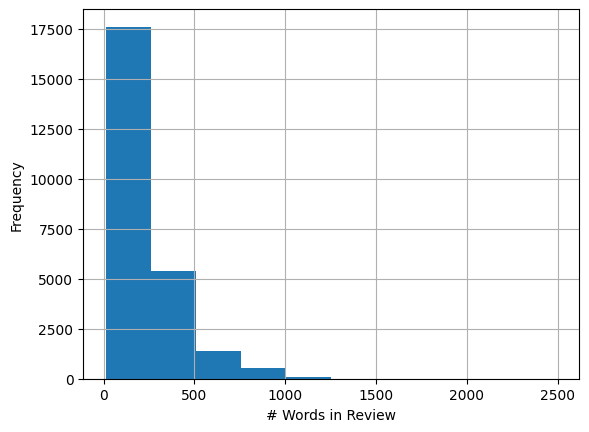

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lengths = np.array(lengths)

plt.hist(lengths)
plt.ylabel('Frequency')
plt.xlabel('# Words in Review')
plt.grid()
plt.show()


In [ ]:
np.quantile(lengths, [0.25, 0.5, 0.75, 0.9])

array([130., 178., 291., 467.])

In [ ]:
#Limiting the length of the reviews to under 250 words (based on the above analysis)
# Reviews with more than 250 word will be trimmed
# Reviews with less than 250 words will be padded by zeros

from keras.utils import pad_sequences
x_train = pad_sequences(x_train, padding='post', maxlen = 100)
x_test = pad_sequences(x_test, padding='post', maxlen = 100)

In [ ]:
lengths_new = []
for rowid in range(len(x_train)):
  lengths_new.append(len(x_train[rowid]))

In [ ]:
lengths_new

[100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100,
 100

In [ ]:
x_train.shape

(25000, 100)

In [ ]:
x_train[0]

array([ 1415,    33,     6,    22,    12,   215,    28,    77,    52,
           5,    14,   407,    16,    82, 10311,     8,     4,   107,
         117,  5952,    15,   256,     4, 31050,     7,  3766,     5,
         723,    36,    71,    43,   530,   476,    26,   400,   317,
          46,     7,     4, 12118,  1029,    13,   104,    88,     4,
         381,    15,   297,    98,    32,  2071,    56,    26,   141,
           6,   194,  7486,    18,     4,   226,    22,    21,   134,
         476,    26,   480,     5,   144,    30,  5535,    18,    51,
          36,    28,   224,    92,    25,   104,     4,   226,    65,
          16,    38,  1334,    88,    12,    16,   283,     5,    16,
        4472,   113,   103,    32,    15,    16,  5345,    19,   178,
          32], dtype=int32)

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM

model = Sequential()
model.add(Embedding(input_dim = 88588, output_dim = 2))
model.add(LSTM(32, return_sequences = False))  # Return sequences - outputs at each timestep. This is only needed for translation or predicting enxt word etc.
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional

model = Sequential()
model.add(Embedding(input_dim = 88588, output_dim=2))
model.add(Bidirectional(LSTM(32, return_sequences=False))) # Return sequences - outputs at each timestep. This is only needed for translation or predicting enxt word etc.
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.compile(optimizer = 'adam', loss='binary_crossentropy', metrics = 'accuracy')


In [ ]:
model.fit(x_train, y_train, epochs = 15, validation_data = (x_test, y_test), batch_size = 1000)

Epoch 1/15
25/25 [==============================] - 28s 881ms/step - loss: 0.6928 - accuracy: 0.5213 - val_loss: 0.6918 - val_accuracy: 0.5715
Epoch 2/15
25/25 [==============================] - 17s 697ms/step - loss: 0.6698 - accuracy: 0.6093 - val_loss: 0.6058 - val_accuracy: 0.6829
Epoch 3/15
25/25 [==============================] - 21s 858ms/step - loss: 0.4783 - accuracy: 0.7780 - val_loss: 0.4557 - val_accuracy: 0.7912
Epoch 4/15
25/25 [==============================] - 18s 714ms/step - loss: 0.3303 - accuracy: 0.8686 - val_loss: 0.3953 - val_accuracy: 0.8316
Epoch 5/15
25/25 [==============================] - 22s 907ms/step - loss: 0.2244 - accuracy: 0.9145 - val_loss: 0.3788 - val_accuracy: 0.8424
Epoch 6/15
25/25 [==============================] - 18s 737ms/step - loss: 0.1604 - accuracy: 0.9422 - val_loss: 0.4265 - val_accuracy: 0.8335
Epoch 7/15
25/25 [==============================] - 23s 922ms/step - loss: 0.1179 - accuracy: 0.9614 - val_loss: 0.4265 - val_accuracy: 0.8380

In [ ]:
preds = model.predict(x_test)

782/782 [==============================] - 6s 8ms/step


In [ ]:
preds

array([[0.01573316],
       [0.9891545 ],
       [0.9864861 ],
       ...,
       [0.01253151],
       [0.86976075],
       [0.64752686]], dtype=float32)

In [ ]:
new_review = 'That was a horrible movie. I did not enjoy it at all'
new_review_tokens = new_review.lower().split()

In [ ]:
new_review_index = []

for token in new_review_tokens:
  if token in word_index.keys():
    new_review_index.append(word_index[token])
  else:
    new_review_index.append(2) #out of vocabulary(oov)=2 hence here there is 2

In [ ]:
new_review_index.insert(0, 1)

In [ ]:
new_review_index

[1, 12, 13, 3, 524, 2, 10, 119, 21, 355, 9, 30, 29]

In [ ]:
new_review_index = pad_sequences(np.array(new_review_index).reshape(1,-1), padding = 'post',maxlen = 100)

In [ ]:
model.predict(new_review_index)

1/1 [==============================] - 0s 77ms/step


array([[0.01846031]], dtype=float32)